In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [38]:
data = pd.read_csv("delivery_Time.csv")

In [39]:
data.head()

,Sorting Time,Delivery Time,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,10,21.00,NaN,NaN,NaN,NaN
1,4,13.50,NaN,NaN,NaN,NaN
2,6,19.75,NaN,NaN,NaN,NaN
3,9,24.00,NaN,NaN,NaN,NaN
4,10,29.00,NaN,NaN,NaN,NaN


In [40]:
data2= data.rename({'Sorting Time': 'Sorting_T','Delivery Time':'Delivery_T'},axis=1)


In [41]:
data2

,Sorting_T,Delivery_T,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,10,21.00,NaN,NaN,NaN,NaN
1,4,13.50,NaN,NaN,NaN,NaN
2,6,19.75,NaN,NaN,NaN,NaN
3,9,24.00,NaN,NaN,NaN,NaN
4,10,29.00,NaN,NaN,NaN,NaN
5,6,15.35,NaN,NaN,Sorting,X
6,7,19.00,NaN,NaN,Delivery,Y
7,3,9.50,NaN,NaN,NaN,NaN
8,10,17.90,NaN,NaN,NaN,NaN
9,9,18.75,NaN,NaN,NaN,NaN


In [42]:
data3 = data2[['Sorting_T','Delivery_T']]

In [43]:
data3

,Sorting_T,Delivery_T
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00
5,6,15.35
6,7,19.00
7,3,9.50
8,10,17.90
9,9,18.75


In [44]:
data3.describe()

,Sorting_T,Delivery_T
count,21.000000,21.000000
mean,6.190476,16.790952
std,2.542028,5.074901
min,2.000000,8.000000
25%,4.000000,13.500000
50%,6.000000,17.830000
75%,8.000000,19.750000
max,10.000000,29.000000


In [45]:
# checking for outliers

<AxesSubplot:xlabel='Delivery_T'>

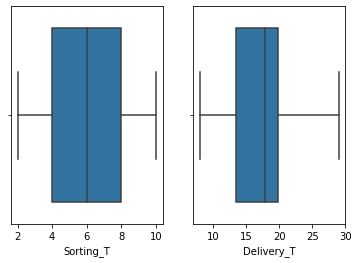

In [46]:
plt.subplot(121)
sns.boxplot(data3['Sorting_T'])
plt.subplot(122)
sns.boxplot(data3['Delivery_T'])

In [47]:
# correlation matrix

In [48]:
data3.corr()

,Sorting_T,Delivery_T
Sorting_T,1.000000,0.825997
Delivery_T,0.825997,1.000000


In [49]:
# checking for na values

In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sorting_T   21 non-null     int64  
 1   Delivery_T  21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [51]:
# checking for duplicates

In [52]:
data3.duplicated().value_counts()

False    21
dtype: int64

In [53]:
# checking for normality

<AxesSubplot:xlabel='Sorting_T', ylabel='Density'>

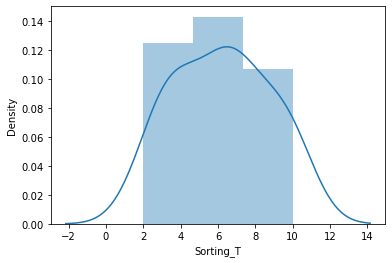

In [54]:
sns.distplot(data3['Sorting_T'])

<AxesSubplot:xlabel='Delivery_T', ylabel='Density'>

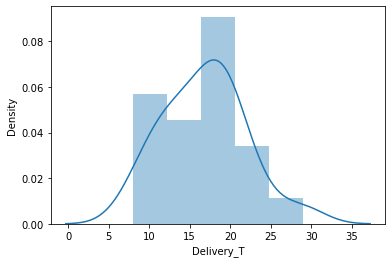

In [55]:
sns.distplot(data3['Delivery_T'])

In [56]:
model = smf.ols('Delivery_T~Sorting_T',data=data3).fit()

<AxesSubplot:xlabel='Sorting_T', ylabel='Delivery_T'>

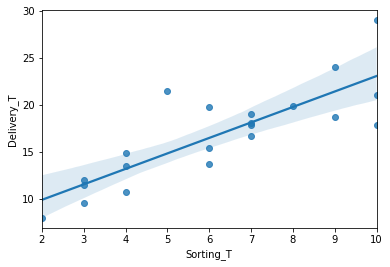

In [57]:
sns.regplot(x = 'Sorting_T',y = 'Delivery_T',data=data3)

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Delivery_T   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        17:24:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_T      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assignment Solution: Predicted values

In [59]:
new_predict= pd.Series([10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5])

In [66]:
data_predict= pd.DataFrame(new_predict,columns=['Sorting_T'])

In [67]:
model.predict(data_predict)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
#predictions for new data points 

In [77]:
new_data= pd.Series([3,4,7])

In [78]:
y_pred = pd.DataFrame(new_data,columns=['Sorting_T'])

In [79]:
y_pred

,Sorting_T
0,3
1,4
2,7


In [80]:
model.predict(y_pred)

0    11.529794
1    13.178814
2    18.125873
dtype: float64

In [36]:
# Appylying transformations on data

In [24]:
model1 = smf.ols('np.sqrt(Delivery_T)~(Sorting_T)', data=data3).fit()

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.sqrt(Delivery_T)   R-squared:                       0.704
Model:                             OLS   Adj. R-squared:                  0.688
Method:                  Least Squares   F-statistic:                     45.20
Date:                 Sun, 11 Jul 2021   Prob (F-statistic):           2.00e-06
Time:                         17:10:18   Log-Likelihood:                -6.6646
No. Observations:                   21   AIC:                             17.33
Df Residuals:                       19   BIC:                             19.42
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
Sorting_T      0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model1.predict(y_pred)

0    3.392626
1    3.599258
2    4.219154
dtype: float64

In [27]:
model2 = smf.ols('np.log(Delivery_T)~(Sorting_T)', data=data3).fit()

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(Delivery_T)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.59e-06
Time:                        17:11:20   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_T      0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
model2.predict(y_pred)

0    2.438027
1    2.543578
2    2.860233
dtype: float64

In [70]:
model3 = smf.ols('np.reciprocal(Delivery_T)~(Sorting_T)', data=data3).fit()

In [71]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.reciprocal(Delivery_T)   R-squared:                       0.682
Model:                                   OLS   Adj. R-squared:                  0.665
Method:                        Least Squares   F-statistic:                     40.68
Date:                       Sun, 11 Jul 2021   Prob (F-statistic):           4.06e-06
Time:                               17:30:38   Log-Likelihood:                 62.471
No. Observations:                         21   AIC:                            -120.9
Df Residuals:                             19   BIC:                            -118.9
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1107      0.008     14.526      0.000       0.095       0.127
Sorting_T     -0.0073      0.001     -6.378      0.000      -0.010      -0.005
==============================================================================
Omnibus:                        1.096   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.224
Skew:                           0.199   Prob(JB):                        0.894
Kurtosis:                       3.313   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
model3.predict(y_pred)

0    0.088819
1    0.081532
2    0.059670
dtype: float64